# Ковариационная и корреляционная матрицы

Модули и функции.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [2]:
# https://newbedev.com/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Матрица признаков $A, B \sim N(0, 1)$.

In [3]:
n = 1000

print('Два независимых нормально распределенных признака:')
X = pd.DataFrame(np.random.randn(n, 2), columns=['A', 'B'])
X.head()

Два независимых нормально распределенных признака:


,A,B
0,-0.012072,-0.024817
1,0.697550,-0.799912
2,-2.129061,0.298734
3,-0.996284,0.491871
4,0.490235,-2.038630


Матрицы ковариации и корреляции через функции *pandas*.

Матрицы ковариации и корреляции (pandas):


,A,B
A,0.969675,-0.023058
B,-0.023058,0.952595
,A,B
A,1.000000,-0.023991
B,-0.023991,1.000000


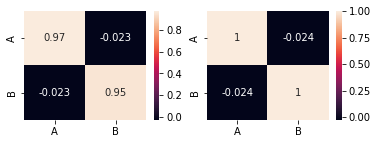

In [4]:
X_cov_pd, X_corr_pd = X.cov(), X.corr()

print('Матрицы ковариации и корреляции (pandas):')
display_side_by_side(X_cov_pd, X_corr_pd)
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
sns.heatmap(X_cov_pd, xticklabels=X_cov_pd.columns, yticklabels=X_cov_pd.columns, annot=True, ax=ax1);
sns.heatmap(X_corr_pd, xticklabels=X_cov_pd.columns, yticklabels=X_cov_pd.columns, annot=True, ax=ax2);

Матрицы ковариации и корреляции по формулам:

$M_{cov}
= \begin{bmatrix} cov_{A,A} & cov_{A,B} \\ cov_{B,A} & cov_{B,B} \end{bmatrix}
= \frac{(X - \bar{X})^T(X - \bar{X})}{n-1}$,

$M_{\sigma}
= \begin{bmatrix}
  \sigma_A \sigma_A & \sigma_A \sigma_B \\
  \sigma_A \sigma_B & \sigma_B \sigma_B
\end{bmatrix}
= \begin{bmatrix}
  \sigma_A \\
  \sigma_B
\end{bmatrix}
\begin{bmatrix}
  \sigma_A \sigma_B \\
\end{bmatrix}$,

$M_{r}
= M_{cov} ./ M_{\sigma}$, где ./ &dash; поэлементное деление матриц.

Матрицы ковариации и корреляции:


,A,B
A,0.969675,-0.023058
B,-0.023058,0.952595
,A,B
A,1.000000,-0.023991
B,-0.023991,1.000000


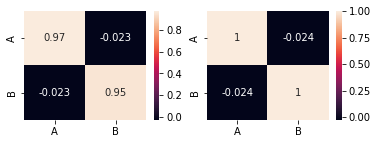

In [5]:
X_centered = X - X.mean()
X_centered_std = X_centered.std().to_frame()

X_cov = X_centered.T @ X_centered / (len(X_centered) - 1)
X_corr = np.divide(X_cov, X_centered_std @ X_centered_std.T)

print('Матрицы ковариации и корреляции:')
display_side_by_side(X_cov, X_corr)
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
sns.heatmap(X_cov, xticklabels=X_cov_pd.columns, yticklabels=X_cov_pd.columns, annot=True, ax=ax1);
sns.heatmap(X_corr, xticklabels=X_cov_pd.columns, yticklabels=X_cov_pd.columns, annot=True, ax=ax2);

Примеры зависимостей признаков, для которых коэффициент корреляции равен 0 (стремится с увеличением выборки).


Начало таблицы признаков и их матрица корреляции:


,x,y
0,0.999931,0.011782
1,0.999915,0.013007
2,0.999900,0.014123
3,0.999889,0.014921
4,0.999837,0.018069
,x,y
x,1.000000,-0.016523
y,-0.016523,1.000000



Зависимость есть, корреляции нет.


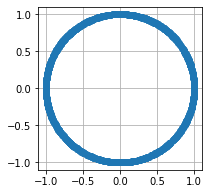

In [6]:
n = 1000
a = np.sort(np.random.uniform(low=0, high=360, size=n))
x = np.apply_along_axis(np.cos, 0, a * np.pi / 180)
y = np.apply_along_axis(np.sin, 0, a * np.pi / 180)
points = pd.DataFrame({'x': x, 'y': y})

print('\nНачало таблицы признаков и их матрица корреляции:')
display_side_by_side(points.head(), points.corr())
print('\nЗависимость есть, корреляции нет.')
_, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect(1)
ax.grid(True)
ax.plot(points.x, points.y, linestyle='solid', marker='o');


Начало таблицы признаков и их матрица корреляции:


,x,y
0,-1.248722,-1.248722
1,-0.000826,-0.000826
2,-0.838848,0.838848
3,-0.251988,0.251988
4,0.171495,0.171495
,x,y
x,1.000000,0.072505
y,0.072505,1.000000



Зависимость есть, корреляции нет.


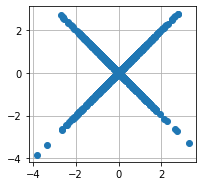

In [7]:
n = 1000
x = np.random.randn(n)
y = np.random.choice([-1, 1], size=n) * x
points = pd.DataFrame({'x': x, 'y': y})

print('\nНачало таблицы признаков и их матрица корреляции:')
display_side_by_side(points.head(), points.corr())
print('\nЗависимость есть, корреляции нет.')
_, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect(1)
ax.grid(True)
ax.plot(points.x, points.y, linestyle='None', marker='o');